In [1]:

# %%file requirements.txt
import pandas as pd 
import numpy as np
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

!pip install lightgbm
import lightgbm as lgb

from sklearn.dummy import DummyClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    # confusion_matrix,
    roc_auc_score,
    RocCurveDisplay,
    # plot_roc_curve,
)

# To be used for data scaling and encoding
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    RobustScaler,
)
from sklearn.impute import SimpleImputer

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin


# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# set the background for the graphs
plt.style.use("ggplot")

# For pandas profiling
# from pandas_profiling import ProfileReport

# Printing style
!pip install tabulate
from tabulate import tabulate

# To supress warnings
import warnings

# date time
from datetime import datetime

import os

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
DATA_PHASE1_FOLDER = "../data/phase-1"
DATA_PROB1_FOLDER = os.path.join(DATA_PHASE1_FOLDER, "prob-1")
DATA_PROB2_FOLDER = os.path.join(DATA_PHASE1_FOLDER, "prob-2")

PARQUET_PROB1 = os.path.join(DATA_PROB1_FOLDER, "raw_train.parquet")
PARQUET_PROB2 = os.path.join(DATA_PROB2_FOLDER, "raw_train.parquet")

CSV_PROB1     = os.path.join(DATA_PROB1_FOLDER, "prob1.csv")
CSV_PROB2     = os.path.join(DATA_PROB2_FOLDER, "prob2.csv")

In [3]:
PARQUET_PROB1

'../data/phase-1/prob-1/raw_train.parquet'

In [4]:
import pyarrow.parquet as pq

df1 = pq.read_table(source=PARQUET_PROB1).to_pandas()
df2 = pq.read_table(source=PARQUET_PROB2).to_pandas()

df1.to_csv(CSV_PROB1, index=False)
df1.to_csv(CSV_PROB2, index=False)

This note book is focus on modeling the problem 1

In [5]:
# read prob1 data 
df1 = pd.read_csv(CSV_PROB1)

In [6]:
df1.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,label,feature14,feature15,feature16
0,Site engineer,grocery_pos,8.600,48230,40.213,-85.204,47583,42.508,-83.168,65.596,3,5,1,1,8.018,1.029,58.911
1,Site engineer,gas_transport,316.840,48230,44.379,-82.860,47583,42.662,-81.967,64.729,6,5,1,1,11.769,1.106,64.431
2,Site engineer,grocery_pos,294.890,48230,42.951,-84.936,47583,42.580,-82.409,65.435,3,5,1,1,7.996,0.900,57.545
3,Site engineer,shopping_net,831.080,48230,39.372,-84.894,47583,41.949,-83.920,64.990,23,6,1,1,8.768,1.063,62.681
4,Site engineer,health_fitness,1063.840,48230,41.227,-83.228,47583,41.545,-82.123,65.316,23,6,1,1,8.816,0.722,63.084


In [7]:
df1.shape

(134201, 17)

In [22]:
# spliting data set into training dataset, validation dataset and testing dataset

test_size = 0.2
val_size  = 0.25
seed      = 1
loss_func = "logloss"

X,y = df1.drop(columns=["label", "feature1", "feature2"]), df1["label"]

# then we split the temporary set into train and validation
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_size, random_state=seed, stratify=y
)


# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=val_size, random_state=seed, stratify=y_temp
)
print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)


Training data shape: 

 (80520, 14) 

Validation Data Shape: 

 (26840, 14) 

Testing Data Shape: 

 (26841, 14)


In [23]:
print("Training: \n", y_train.value_counts(normalize=True))
print("\n\nValidation: \n", y_val.value_counts(normalize=True))
print("\n\nTest: \n", y_test.value_counts(normalize=True))

Training: 
 0   0.937
1   0.063
Name: label, dtype: float64


Validation: 
 0   0.937
1   0.063
Name: label, dtype: float64


Test: 
 0   0.937
1   0.063
Name: label, dtype: float64


# Data preprocessing

Pre-processing steps:

- Drop feature 1 and feature 2 as it's job and job sector related, which is not the cause for fraud transaction based on job titles. (bias factors)

- Data Split into Dependent and Target sets

- Data Split to Train, Test and Validation sets Standardize feature names

- Missing Value/Incorrect Value treatment

- Encoding Scaling/Outlier treatment

In [24]:
# %% file data_preprocessing.py

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin

# building a func to standardize cols
def feature_name_standardize(df : pd.DataFrame):
    df_ = df.copy()
    df_.columns = [i.replace(" ", "_").lower() for i in df_.columns]
    return df_

# Building a func to drop features
def drop_feature(df : pd.DataFrame, features: list()):
    if (len(features) != 0):
        df_ = df_.drop(columns=features)
    
    return df_

# Building a func to treat incorrect value
def mask_value(df: pd.DataFrame, feature: str = None, value_to_mask: str = None, masked_value: str = None):
    df_ = df.copy()
    if feature != None and value_to_mask != None:
        if feature in df_.columns:
            df_[feature] = df_[feature].astype('object')
            df_.loc[df_[df_[feature] == value_to_mask].index, feature] = masked_value
            df_[feature] = df_[feature].astype('category')
    
    return df_

# Building a custom imputer
def impute_category_unknown(df : pd.DataFrame, fill_value: str):
    df_ = df.copy()
    for col in df_.select_dtypes(include='category').columns.tolist():
        df_[col] = df_[col].astype('object')
        df_[col] = df_[col].fillna('Unknown')
        df_[col] = df_[col].astype('category')
    
    return df_

# Building a custom data preprocessing class with fit and transform methods for standardizing column names
class FeatureNamesStandardizer(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Returns dataframe with column names in lower case with underscores in place of spaces."""
        X_ = feature_name_standardize(X)
        return X_

# Building a custom data preprocessing class with fit and transform methods for dropping columns
class ColumnDropper(TransformerMixin):
    def __init__(self, features : list()):
        self.features = features
    
    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """given a list of columns, return a dataframe without those columns"""
        X_ = drop_feature(X, features=self.features)
        return X_
    

# Building a custom data preprocessing class with fit and transform methods for custom value masking
class CustomValueMasker(TransformerMixin):
    def __init__(self, feature: str, value_to_mask: str, masked_value: str):
        self.feature = feature
        self.value_to_mask = value_to_mask
        self.masked_value = masked_value

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = mask_value(X, self.feature, self.value_to_mask, self.masked_value)
        return X_
    
    
# Building a custom class to one-hot encode using pandas
class PandasOneHot(TransformerMixin):
    def __init__(self, columns: list = None):
        self.columns = columns

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = pd.get_dummies(X, columns = self.columns, drop_first=True)
        return X_
    
# Building a custom class to fill nulls with Unknown
class FillUnknown(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = impute_category_unknown(X, fill_value='Unknown')
        return X_

In [25]:
# %%file data_preprocessing.py
# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin

# Building a function to standardize columns

def feature_name_standardize(df: pd.DataFrame):
    df_ = df.copy()
    df_.columns = [i.replace(" ", "_").lower() for i in df_.columns]
    return df_

# Building a function to drop features

def drop_feature(df: pd.DataFrame, features: list = []):
    df_ = df.copy()
    if len(features) != 0:
        df_ = df_.drop(columns=features)
        
    return df_

# Building a function to treat incorrect value

def mask_value(df: pd.DataFrame, feature: str = None, value_to_mask: str = None, masked_value: str = None):
    df_ = df.copy()
    if feature != None and value_to_mask != None:
        if feature in df_.columns:
            df_[feature] = df_[feature].astype('object')
            df_.loc[df_[df_[feature] == value_to_mask].index, feature] = masked_value
            df_[feature] = df_[feature].astype('category')
            
    return df_

# Building a custom imputer

def impute_category_unknown(df: pd.DataFrame, fill_value: str):
    df_ = df.copy()
    for col in df_.select_dtypes(include='category').columns.tolist():
        df_[col] = df_[col].astype('object')
        df_[col] = df_[col].fillna('Unknown')
        df_[col] = df_[col].astype('category')
    return df_

# Building a custom data preprocessing class with fit and transform methods for standardizing column names

class FeatureNamesStandardizer(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Returns dataframe with column names in lower case with underscores in place of spaces."""
        X_ = feature_name_standardize(X)
        return X_
    
    
# Building a custom data preprocessing class with fit and transform methods for dropping columns

class ColumnDropper(TransformerMixin):
    def __init__(self, features: list):
        self.features = features

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Given a list of columns, returns a dataframe without those columns."""
        X_ = drop_feature(X, features=self.features)
        return X_
        
    

# Building a custom data preprocessing class with fit and transform methods for custom value masking

class CustomValueMasker(TransformerMixin):
    def __init__(self, feature: str, value_to_mask: str, masked_value: str):
        self.feature = feature
        self.value_to_mask = value_to_mask
        self.masked_value = masked_value

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = mask_value(X, self.feature, self.value_to_mask, self.masked_value)
        return X_
    
    
# Building a custom class to one-hot encode using pandas
class PandasOneHot(TransformerMixin):
    def __init__(self, columns: list = None):
        self.columns = columns

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = pd.get_dummies(X, columns = self.columns, drop_first=True)
        return X_
    
# Building a custom class to fill nulls with Unknown
class FillUnknown(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = impute_category_unknown(X, fill_value='Unknown')
        return X_


if __name__ == "__main__":
  
  X_train_prep = X_train.copy()
  X_val_prep   = X_val.copy()
  X_test_prep  = X_test.copy()
  
  # To Standardize feature names
  feature_name_standardizer = FeatureNamesStandardizer()
  
  X_train_prep = feature_name_standardizer.fit_transform(X_train_prep)
  X_val_prep   = feature_name_standardizer.transform(X_val_prep)
  X_test_prep  = feature_name_standardizer.transform(X_test_prep)


  # To impute categorical Nulls to Unknown
  cat_columns = X_train.select_dtypes(include="category").columns.tolist()
  imputer = FillUnknown()

  X_train_prep[cat_columns] = imputer.fit_transform(X_train_prep[cat_columns])
  X_val_prep[cat_columns] = imputer.transform(X_val_prep[cat_columns])
  X_test_prep[cat_columns] = imputer.transform(X_test_prep[cat_columns])

  # To encode the data
  one_hot = PandasOneHot()

  X_train_prep = one_hot.fit_transform(X_train_prep)
  X_val_prep = one_hot.transform(X_val_prep)
  X_test_prep = one_hot.transform(X_test_prep)


  # Scale the numerical columns
  robust_scaler = RobustScaler(with_centering=False, with_scaling=True)
  num_columns = [
          "feature3",
          "feature4",
          "feature5",
          "feature6",
          "feature7",
          "feature8",
          "feature9",
          "feature10",
          "feature11",
          "feature12",
          "feature13",
          "feature14",
          "feature15",
          "feature16"
      ]

  X_train_prep[num_columns] = pd.DataFrame(
      robust_scaler.fit_transform(X_train_prep[num_columns]),
      columns=num_columns,
      index=X_train_prep.index,
  )
  X_val_prep[num_columns] = pd.DataFrame(
      robust_scaler.transform(X_val_prep[num_columns]), columns=num_columns, index=X_val_prep.index
  )
  X_test_prep[num_columns] = pd.DataFrame(
      robust_scaler.transform(X_test_prep[num_columns]),
      columns=num_columns,
      index=X_test_prep.index,
  )

In [33]:
X_train_prep.head()

,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16
87583,0.721,0.422,4.671,-3.902,0.046,5.431,-4.216,1.627,1.417,2.000,2.000,3.408,1.865,10.531
5779,0.760,1.888,4.771,-6.149,3.469,5.097,-6.761,2.481,0.750,0.333,1.000,2.797,2.942,9.761
58795,0.481,0.887,5.614,-4.242,0.206,5.653,-4.503,1.776,0.167,2.000,1.000,4.104,0.948,9.644
109984,0.062,0.578,4.726,-4.336,0.519,4.859,-4.542,1.928,1.417,1.000,1.000,3.504,2.321,10.414
97100,0.488,0.904,5.239,-4.477,0.218,5.367,-4.679,1.339,1.750,0.333,1.000,2.200,1.340,9.715


In [32]:
X_train_prep.describe()

,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16
count,80520.000,80520.000,80520.000,80520.000,80520.000,80520.000,80520.000,80520.000,80520.000,80520.000,80520.000,80520.000,80520.000,80520.000
mean,1.218,1.016,4.825,-4.755,1.274,5.066,-5.080,2.042,1.061,1.159,1.505,2.764,1.823,9.431
std,2.505,0.593,0.739,0.846,2.393,0.731,0.898,0.703,0.587,0.665,0.537,0.738,0.803,0.748
min,0.012,0.022,1.537,-8.971,0.001,2.559,-9.352,0.992,0.000,0.000,1.000,-0.343,-1.149,6.095
25%,0.122,0.563,4.326,-5.119,0.072,4.572,-5.424,1.481,0.583,0.667,1.000,2.264,1.288,8.936
50%,0.600,0.927,4.858,-4.513,0.267,5.109,-4.812,1.901,1.167,1.333,1.000,2.765,1.776,9.441
75%,1.122,1.563,5.326,-4.119,1.072,5.572,-4.424,2.481,1.583,1.667,2.000,3.264,2.288,9.936
max,196.207,2.002,9.951,-3.285,12.521,9.719,-3.826,4.108,1.917,2.000,3.000,5.798,5.661,12.651


In [37]:
print(
    "Training data shape: \n\n",
    X_train_prep.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val_prep.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test_prep.shape,
)

Training data shape: 

 (80520, 14) 

Validation Data Shape: 

 (26840, 14) 

Testing Data Shape: 

 (26841, 14)


# Model Building

For the Fraud transaction classification challenge, with the input information, Let's start by building different models using KFold and cross_val_score and tune the best model using RandomizedSearchCV

Stratified K-Folds cross-validation provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

Building folowing models: 

- LDA
- QDA
- Linear regression
- SVM 
- KNN
- Naive Bayes


- Random Forest
- Gradient Boosting
- Ada Boosting
- Extream Gradient Boosting
- Decesion Tree Classification 
- Light Gradient Boosting

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

Since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. Before is a diagrammatic representation by the makers of the Light GBM to explain the difference clearly. (Source: TowardsDataScience)

I add aditional model : LDA, QDA, LR, SVM

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model          import LogisticRegression
from sklearn.naive_bayes           import GaussianNB
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.svm                   import SVC

Using LDA model for training
Using QDA model for training
Using LR model for training
Using NB model for training
Using KNN model for training
Using Bagging model for training
Using Random forest model for training
Using GBM model for training
Using Adaboost model for training
Using Xgboost model for training
Using DecisionTreeClassifier model for training
Using Light GBM model for training
Operation Completed


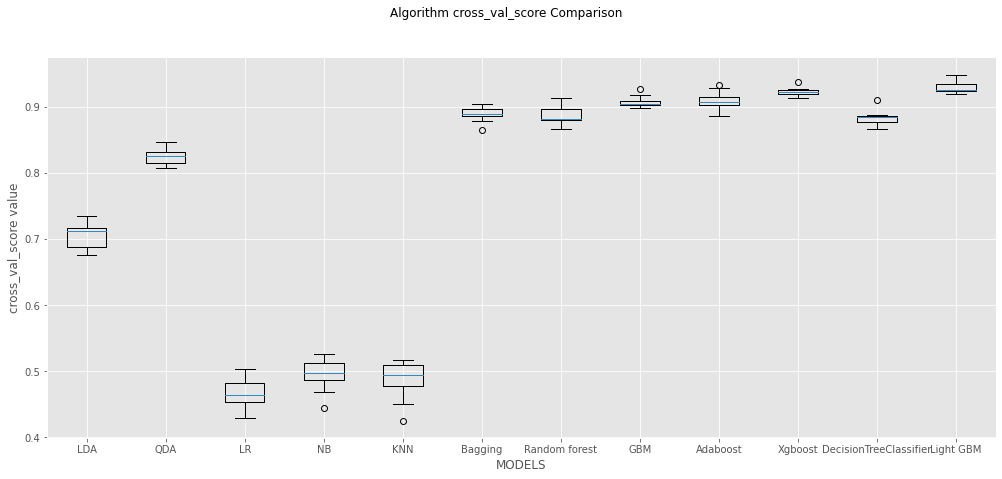

None


In [49]:
# %%file origin_model.py
# with original dataset

def get_metrics_score(
        model, train, test, train_y, test_y, threshold=0.5, flag=False, roc=True
):
    # defining an empty list to store train and test res

    score_list = []

    pred_train = model.predict_proba(train)[:, 1] > threshold
    pred_test  = model.predict_proba(test)[:, 1]  > threshold

    pred_train = np.round(pred_train)
    pred_test  = np.round(pred_test)

    train_acc  = accuracy_score(pred_train, train_y)
    test_acc   = accuracy_score(pred_test, test_y)
   
    train_recall = recall_score(train_y, pred_train)
    test_recall  = recall_score(test_y, pred_test)

    train_precision = precision_score(train_y, pred_train)
    test_precision  = precision_score(test_y, pred_test)

    train_f1 = f1_score(train_y, pred_train)
    test_f1  = f1_score(test_y, pred_test)

    pred_train_proba = model.predict_proba(train)[:, 1]
    pred_test_proba  = model.predict_proba(test)[:, 1]

    train_roc_auc = roc_auc_score(train_y, pred_train_proba)
    test_roc_auc  = roc_auc_score(test_y, pred_test_proba)
    
    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
            train_f1,
            test_f1,
            train_roc_auc,
            test_roc_auc,
        )
    )

    if flag == True:
        print("Accuracy on training set  : ", accuracy_score(pred_train, train_y))
        print("Accuracy on test set      : ", accuracy_score(pred_test, test_y))
        print("Recall on training set    : ", recall_score(train_y, pred_train))
        print("Recall on test set        : ", recall_score(test_y, pred_test))
        print("Precision on training set : ", precision_score(train_y, pred_train))
        print("Precision on test set     : ", precision_score(test_y, pred_test))
        print("F1 on training set        : ", f1_score(train_y, pred_train))
        print("F1 on test set            : ", f1_score(test_y, pred_test))

    if roc == True:
        if flag == True:
            print(
                "ROC-AUC Score on training set : ",
                roc_auc_score(train_y, pred_train_proba),
            )
            print(
                "ROC-AUC Score on test set : ", roc_auc_score(test_y, pred_test_proba)
            )

    return score_list  # returning the list with train and test scores

# get confusion matrix
def make_confusion_matrix(model, test_X, y_actual, labels=[1,0]):
    
    y_pred = model.predict(test_X)
    cm = metrics.confusion_matrix(y_actual, y_pred, labels=[1, 0])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - Attributed", "Actual - Exisiting"]],
        columns=[i for i in ["Predicted - Atrited", "Predicted - Existing"]]
    )

    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(7, 3))
    sns.heatmap(df_cm, annot=labels, fmt="", cmap="Blues").set(title="Confusion Matrix")

## STEP 2: defining empty lists to add train and test results to add to each model
model_names     = []
acc_train       = []
acc_test        = []
recall_train    = []
recall_test     = []
precision_train = []
precision_test  = []
f1_train        = []
f1_test         = []
roc_auc_train   = []
roc_auc_test    = []
cross_val_train = []


def add_score_model(model_name, score, cv_res):
    """Add scores to list so that we can compare all models score together"""
    model_names.append(model_name)
    acc_train.append(score[0])
    acc_test.append(score[1])
    recall_train.append(score[2])
    recall_test.append(score[3])
    precision_train.append(score[4])
    precision_test.append(score[5])
    f1_train.append(score[6])
    f1_test.append(score[7])
    roc_auc_train.append(score[8])
    roc_auc_test.append(score[9])
    cross_val_train.append(cv_res)


# Plotting boxplots for CV scores of all models defined above
def make_boxplot(cv_result, model_name): 
    fig = plt.figure(figsize=(17, 7))

    fig.suptitle("Algorithm cross_val_score Comparison")
    ax = fig.add_subplot(111)

    plt.boxplot(cv_result)
    ax.set_xticklabels(model_names)
    ax.set(
       xlabel='MODELS',
       ylabel='cross_val_score value',
    )
    return plt.show()

if __name__ == "__main__":
    models     = []
    cv_results = []

    # Appending models into the list
    models.append(("LDA", LinearDiscriminantAnalysis()))
    models.append(("QDA", QuadraticDiscriminantAnalysis()))
    models.append(("LR", LogisticRegression(random_state=seed)))
    models.append(("NB", GaussianNB()))
    models.append(("KNN", KNeighborsClassifier()))
#    models.append(("SVM", SVC(kernel="rbf", random_state=seed)))

    models.append(("Bagging", BaggingClassifier(random_state=seed)))
    models.append(("Random forest", RandomForestClassifier(random_state=seed)))
    models.append(("GBM", GradientBoostingClassifier(random_state=seed)))
    models.append(("Adaboost", AdaBoostClassifier(random_state=seed)))
    models.append(("Xgboost", XGBClassifier(random_state=seed, eval_metric=loss_func)))
    models.append(("DecisionTreeClassifier", DecisionTreeClassifier(random_state=seed)))
    models.append(("Light GBM", lgb.LGBMClassifier(random_state=seed)))

    # For each model, run cross validation on 9 folds (+ 1 validation fold) with scoring for recall  
    for name, model in models:
        scoring = "recall"
        
        kflod = StratifiedKFold(
            n_splits=10, shuffle=True, random_state=1
        ) # setting number of splits equal to 10

        cv_res = cross_val_score(
            estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kflod
        )

        cv_results.append(cv_res)

        model.fit(X_train, y_train)
        model_score = get_metrics_score(model, X_train, X_val, y_train, y_val)
        add_score_model(name, model_score, cv_res.mean())

        print(f"Using {name} model for training")

print("Operation Completed")


## STEP 4: visualize all models result to compare performances
# comparison frame
comparison_frame = pd.DataFrame(
      {
          "Model": model_names,
          "Cross_Val_Score_Train": cross_val_train,
          "Train_Accuracy": acc_train,
          "Test_Accuracy": acc_test,
          "Train_Recall": recall_train,
          "Test_Recall": recall_test,
          "Train_Precision": precision_train,
          "Test_Precision": precision_test,
          "Train_F1": f1_train,
          "Test_F1": f1_test,
          "Train_ROC_AUC": roc_auc_train,
          "Test_ROC_AUC": roc_auc_test,
      }
  )

  # Also show boxplot on models performance: 
print(make_boxplot(cv_result=cv_results, model_name=model_names))

In [51]:
comparison_frame.sort_values(
    by = ["Cross_Val_Score_Train", "Test_Recall"], ascending=False
).style.highlight_max(color="green", axis=0).highlight_min(color="red", axis=0)

,Model,Cross_Val_Score_Train,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1,Train_ROC_AUC,Test_ROC_AUC
11,Light GBM,0.930169,0.997454,0.992846,0.974500,0.928824,0.985128,0.956970,0.979785,0.942687,0.999926,0.998113
9,Xgboost,0.923108,0.999578,0.992176,0.993723,0.922353,0.999605,0.952612,0.996656,0.937238,0.999997,0.997408
8,Adaboost,0.908985,0.990288,0.989717,0.911926,0.901765,0.933159,0.933618,0.922421,0.917415,0.998011,0.996924
7,GBM,0.907610,0.992312,0.990984,0.917222,0.903529,0.959573,0.951673,0.937920,0.926976,0.997993,0.997278
5,Bagging,0.888780,0.999044,0.989382,0.986858,0.881176,0.998016,0.947502,0.992406,0.913136,0.999990,0.983456
6,Random forest,0.887797,0.999988,0.990760,0.999804,0.884706,1.000000,0.966581,0.999902,0.923833,1.000000,0.994786
10,DecisionTreeClassifier,0.883877,1.000000,0.984091,1.000000,0.864706,1.000000,0.881824,1.000000,0.873181,1.000000,0.928435
1,QDA,0.825224,0.981123,0.980551,0.825814,0.815882,0.869475,0.869048,0.847082,0.841626,0.989587,0.988034
0,LDA,0.705176,0.975571,0.976490,0.705963,0.714706,0.884927,0.892726,0.785379,0.793858,0.986170,0.985440
3,NB,0.494120,0.957650,0.958458,0.492938,0.512941,0.752846,0.752373,0.595780,0.610003,0.895781,0.888420


- The best model respect to cross validation score and test recall is light GBM

#### Remark

We can see that we have the pretty good performance in training dataset and val dataset, because of imbalanced dataset issue
Most machine learning algorithms work best when the number of samples in each class is about equal. This is because most algorithms are designed to maximize accuracy and reduce errors.

However, if the dataframe has imbalanced classes, then In such cases, we will get a pretty high accuracy just by predicting the majority class, but you fail to capture the minority class, which is most often the point of creating the model in the first place. 

# Resampling Techniques to Solve Class Imbalance

One of the widely adopted class imbalance techniques for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).

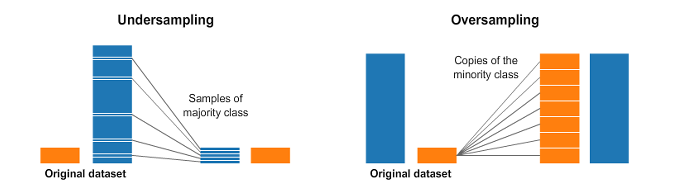

In [55]:
print(f"traning dataset class 0  {y_train[y_train == 0].shape[0]}")
print(f"traning dataset class 1  {y_train[y_train == 1].shape[0]}")

traning dataset class 0  75422
traning dataset class 1  5098


## Over-Sampling


In [56]:
def oversampling_data():
    return SMOTE(
        sampling_strategy="minority", k_neighbors=10, random_state=seed
    )

In [57]:

X_train_over, y_train_over = oversampling_data().fit_resample(X_train, y_train)
print("Before UpSampling, counts of label 'Yes-fraud': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No-nofraud': {} \n".format(sum(y_train == 0)))

print("After UpSampling, counts of label 'Yes-fraud': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No-nofraud': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))


Before UpSampling, counts of label 'Yes-fraud': 5098
Before UpSampling, counts of label 'No-nofraud': 75422 

After UpSampling, counts of label 'Yes-fraud': 75422
After UpSampling, counts of label 'No-nofraud': 75422 

After UpSampling, the shape of train_X: (150844, 14)
After UpSampling, the shape of train_y: (150844,) 



In [58]:
# %%file oversample_model.py
# import model
# from model import comparison_frame, make_boxplot, add_score_model

def oversampling_data():
  sm = SMOTE(
      sampling_strategy="minority", k_neighbors=10, random_state=seed
  )  # Synthetic Minority Over Sampling Technique
  return sm

### STEP 3: model build and performance comparision with oversampling data: 

if __name__ == "__main__":
  X_train_over, y_train_over = oversampling_data().fit_resample(X_train, y_train)
  models_over = []

  # Appending models into the list

  models_over.append(("Bagging UpSampling", BaggingClassifier(random_state=seed)))
  models_over.append(
      ("Random forest UpSampling", RandomForestClassifier(random_state=seed))
  )
  models_over.append(("GBM UpSampling", GradientBoostingClassifier(random_state=seed)))
  models_over.append(("Adaboost UpSampling", AdaBoostClassifier(random_state=seed)))
  models_over.append(
      ("Xgboost UpSampling", XGBClassifier(random_state=seed, eval_metric=loss_func))
  )
  models_over.append(("dtree UpSampling", DecisionTreeClassifier(random_state=seed)))
  models_over.append(("Light GBM UpSampling", lgb.LGBMClassifier(random_state=seed)))

  for name, model in models_over:
      scoring = "recall"
      kfold = StratifiedKFold(
          n_splits=10, shuffle=True, random_state=1
      )  # Setting number of splits equal to 10

      cv_result_over = cross_val_score(
          estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
      )
      cv_results.append(cv_result_over)

      model.fit(X_train_over, y_train_over)
      model_score_over = get_metrics_score(
          model, X_train_over, X_val, y_train_over, y_val
      )
      add_score_model(name, model_score_over, cv_result_over.mean())

  print("Operation Completed!")

Operation Completed!


In [59]:

## Comparing Models
comparison_frame = pd.DataFrame(
      {
          "Model": model_names,
          "Cross_Val_Score_Train": cross_val_train,
          "Train_Accuracy": acc_train,
          "Test_Accuracy": acc_test,
          "Train_Recall": recall_train,
          "Test_Recall": recall_test,
          "Train_Precision": precision_train,
          "Test_Precision": precision_test,
          "Train_F1": f1_train,
          "Test_F1": f1_test,
          "Train_ROC_AUC": roc_auc_train,
          "Test_ROC_AUC": roc_auc_test,
      }
  )

  # Sorting models in decreasing order of test recall
comparison_frame.sort_values(
      by=["Test_Recall", "Cross_Val_Score_Train"], ascending=False
  ).style.highlight_max(color="green", axis=0).highlight_min(color="red", axis=0)

,Model,Cross_Val_Score_Train,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1,Train_ROC_AUC,Test_ROC_AUC
14,GBM UpSampling,0.975763,0.976141,0.973510,0.976612,0.955294,0.975693,0.718902,0.976152,0.820409,0.997362,0.995201
18,Light GBM UpSampling,0.984328,0.985800,0.980328,0.987152,0.953529,0.984489,0.783092,0.985819,0.859947,0.999204,0.995319
15,Adaboost UpSampling,0.973244,0.973158,0.972876,0.973032,0.951176,0.973277,0.714854,0.973154,0.816254,0.996991,0.993403
16,Xgboost UpSampling,0.990268,0.995346,0.983271,0.996566,0.941176,0.994141,0.820934,0.995352,0.876953,0.999893,0.994197
13,Random forest UpSampling,0.989976,1.000000,0.980700,1.000000,0.936471,1.000000,0.795205,1.000000,0.860076,1.000000,0.994260
11,Light GBM,0.930169,0.997454,0.992846,0.974500,0.928824,0.985128,0.956970,0.979785,0.942687,0.999926,0.998113
9,Xgboost,0.923108,0.999578,0.992176,0.993723,0.922353,0.999605,0.952612,0.996656,0.937238,0.999997,0.997408
12,Bagging UpSampling,0.981756,0.998893,0.977422,0.998581,0.917647,0.999204,0.769990,0.998893,0.837359,0.999994,0.982595
17,dtree UpSampling,0.974835,1.000000,0.965611,1.000000,0.908824,1.000000,0.667964,1.000000,0.769998,1.000000,0.939137
7,GBM,0.907610,0.992312,0.990984,0.917222,0.903529,0.959573,0.951673,0.937920,0.926976,0.997993,0.997278


In [97]:
cols = X_train_over.columns[sfm_selector.get_support()].to_list()
cols

['feature3',
 'feature5',
 'feature6',
 'feature8',
 'feature9',
 'feature10',
 'feature16']

### Selection features with SelectKBest

Univariate Feature Selection is a feature selection method based on the univariate statistical test, e,g: chi2, Pearson-correlation, and many more.

The premise with SelectKBest is combining the univariate statistical test with selecting the K-number of features based on the statistical result between the X and y.

These objects take as input a scoring function that returns univariate scores and p-values (or only scores for SelectKBest and SelectPercentile)

For classification: chi2, f_classif, mutual_info_classif

In [114]:
from sklearn.feature_selection  import SelectKBest
from sklearn.feature_selection import  mutual_info_classif
from sklearn.feature_selection import SelectFromModel

def select_features():
    return SelectFromModel(estimator= XGBClassifier(random_state=seed, eval_metric=loss_func))

sfm_selector = select_features()
sfm_selector.fit(X_train_over, y_train_over)
cols = X_train_over.columns[sfm_selector.get_support()].to_list()

md = LogisticRegression()
md.fit(X_train_over.loc[: , cols], y_train_over)
md_metrics_score = get_metrics_score(
          md, X_train_over.loc[:, cols], X_val.loc[:, cols], y_train_over, y_val, flag=True
      )
cols

Accuracy on training set  :  0.9495903052159848
Accuracy on test set      :  0.9504098360655737
Recall on training set    :  0.9481451035506882
Recall on test set        :  0.9217647058823529
Precision on training set :  0.9508935694909845
Precision on test set     :  0.5667269439421339
F1 on training set        :  0.9495173476026715
F1 on test set            :  0.7019036954087347
ROC-AUC Score on training set :  0.9889219982797774
ROC-AUC Score on test set :  0.983579694885114


['feature3', 'feature15']

In [ ]:
from sklearn.feature_selection  import SelectKBest
from sklearn.feature_extraction import f_classif

def select_features():
    return SelectKBest(f_classif, k=2)


if __name__ == "__main__":
  X_train_sel, y_train_sel = oversampling_data().fit_resample(X_train_over, y_train_over)
  models_sel = []

  # Appending models into the list

  models_sel.append(("Bagging UpSampling + FeatureSel", BaggingClassifier(random_state=seed)))
  models_sel.append(
      ("Random forest UpSampling + FeatureSel", RandomForestClassifier(random_state=seed))
  )
  models_over.append(("GBM UpSampling + FeatureSel", GradientBoostingClassifier(random_state=seed)))
  models_over.append(("Adaboost UpSampling + FeatureSel", AdaBoostClassifier(random_state=seed)))
  models_over.append(
      ("Xgboost UpSampling + FeatureSel", XGBClassifier(random_state=seed, eval_metric=loss_func))
  )
  models_over.append(("dtree UpSampling + FeatureSel", DecisionTreeClassifier(random_state=seed)))
  models_over.append(("Light GBM UpSampling + FeatureSel", lgb.LGBMClassifier(random_state=seed)))

  for name, model in models_over:
      print(name, " model")
      scoring = "recall"
      kfold = StratifiedKFold(
          n_splits=10, shuffle=True, random_state=1
      )  # Setting number of splits equal to 10

      cv_result_over = cross_val_score(
          estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
      )
      cv_results.append(cv_result_over)

      model.fit(X_train_over, y_train_over)
      model_score_over = get_metrics_score(
          model, X_train_over, X_val, y_train_over, y_val
      )
      add_score_model(name, model_score_over, cv_result_over.mean())

  print("Operation Completed!")


# Downsampling train data using Random Under Sample

In [61]:



def undersampling_data():
  rus = RandomUnderSampler(random_state=1)
  return rus


X_train_un, y_train_un = undersampling_data().fit_resample(X_train, y_train)

print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

     

Before Under Sampling, counts of label 'Yes': 5098
Before Under Sampling, counts of label 'No': 75422 

After Under Sampling, counts of label 'Yes': 5098
After Under Sampling, counts of label 'No': 5098 

After Under Sampling, the shape of train_X: (10196, 14)
After Under Sampling, the shape of train_y: (10196,) 



In [60]:

# %%file undersample_model.py
# import model
# from model import comparison_frame, make_boxplot, add_score_model
def undersampling_data():
  rus = RandomUnderSampler(random_state=1)
  return rus

### STEP 3: model build and performance comparision with undersampling data: 

if __name__ == "__main__":
  X_train_un, y_train_un = undersampling_data().fit_resample(X_train, y_train)
  models_under = []

  # Appending models into the list

  models_under.append(("Bagging DownSampling", BaggingClassifier(random_state=seed)))
  models_under.append(
      ("Random forest DownSampling", RandomForestClassifier(random_state=seed))
  )
  models_under.append(("GBM DownSampling", GradientBoostingClassifier(random_state=seed)))
  models_under.append(("Adaboost DownSampling", AdaBoostClassifier(random_state=seed)))
  models_under.append(
      ("Xgboost DownSampling", XGBClassifier(random_state=seed, eval_metric=loss_func))
  )
  models_under.append(("dtree DownSampling", DecisionTreeClassifier(random_state=seed)))
  models_under.append(("Light GBM DownSampling", lgb.LGBMClassifier(random_state=seed)))

  for name, model in models_under:
      scoring = "recall"
      kfold = StratifiedKFold(
          n_splits=10, shuffle=True, random_state=1
      )  # Setting number of splits equal to 10

      cv_result_under = cross_val_score(
          estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
      )
      cv_results.append(cv_result_under)

      model.fit(X_train_un, y_train_un)
      model_score_under = get_metrics_score(model, X_train_un, X_val, y_train_un, y_val)
      add_score_model(name, model_score_under, cv_result_under.mean())

  print("Operation Completed!")


Operation Completed!
